## DataFrames cleaned, created, engineered in this notebook:

##### Hour-by-hour measurements
- houston_hourly
- cincy_hourly
- newyork_hourly
- atlanta_hourly

##### Monthly averages, based on hourly data
- houston_monthly_avg
- cincy_monthly_avg
- newyork_monthly_avg
- atlanta_monthly_avg

##### Minimum measurements by month
- houston_monthly_min
- cincy_monthly_min
- newyork_monthly_min
- atlanta_monthly_min

##### Maximum measurements by month
- houston_monthly_max
- cincy_monthly_max
- newyork_monthly_max
- atlanta_monthly_max

##### Aggregations of the avg / min / max *temperature* values from the DataFrames above
- houston_temps
- cincy_temps
- newyork_temps
- atlanta_temps

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
houston_hourly = pd.read_csv('./Houston_TX/houston_hourly.csv')
cincy_hourly = pd.read_csv('./Cincinnati_KY/Cincinnati_hourly.csv')
newyork_hourly = pd.read_csv('./LaGuardia_NY/NewYork_hourly.csv')
atlanta_hourly = pd.read_csv('./Atlanta_GA/atlanta_hourly.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (2,4,5,7,9,10,11,12,13,14,15,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (2,3,4,5,7,9,10,12,13,14,15,17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (2,3,4,5,7,10,12,13,15,17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (2,3,4,5,7,10,12,13,15) have mixed types.Specify dtype option on import 

### Inspect the Houston DataFrame

In [58]:
houston_hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 771942 entries, 0 to 771941
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 771942 non-null  int64  
 1   DATE                       771942 non-null  object 
 2   HourlyAltimeterSetting     534142 non-null  object 
 3   HourlyDewPointTemperature  655483 non-null  object 
 4   HourlyDryBulbTemperature   655912 non-null  object 
 5   HourlyPrecipitation        224787 non-null  object 
 6   HourlyPresentWeatherType   137795 non-null  object 
 7   HourlyPressureChange       114684 non-null  object 
 8   HourlyPressureTendency     115463 non-null  float64
 9   HourlyRelativeHumidity     655473 non-null  object 
 10  HourlySeaLevelPressure     494506 non-null  object 
 11  HourlySkyConditions        277609 non-null  object 
 12  HourlyStationPressure      307769 non-null  object 
 13  HourlyVisibility           68

#### Dropping known useless columns
These are columns predetermined not to add value due to their subjectivity

In [59]:
houston_hourly.drop(columns = ['Unnamed: 0','HourlyPresentWeatherType','HourlySkyConditions'],inplace=True)
cincy_hourly.drop(columns = ['Unnamed: 0','HourlyPresentWeatherType','HourlySkyConditions'],inplace=True)
newyork_hourly.drop(columns = ['Unnamed: 0','HourlyPresentWeatherType','HourlySkyConditions'],inplace=True)
atlanta_hourly.drop(columns = ['Unnamed: 0','HourlyPresentWeatherType','HourlySkyConditions'],inplace=True)

#### Converting "object" types into numeric values
Some of the data points are "29.99s" instead of "29.99" for example, and this code serves to 'coerce' them into numeric values

In [60]:
# not included: 'HourlyPresentWeatherType','HourlySkyConditions',
to_numeric_list = ['HourlyAltimeterSetting', 'HourlyDewPointTemperature', 'HourlyDryBulbTemperature',
       'HourlyPrecipitation', 'HourlyPressureChange', 'HourlyPressureTendency',
       'HourlyRelativeHumidity', 'HourlySeaLevelPressure', 'HourlyStationPressure', 'HourlyVisibility',
       'HourlyWetBulbTemperature', 'HourlyWindDirection', 'HourlyWindSpeed','HourlyWindGustSpeed']

for i in to_numeric_list:
    houston_hourly[i] = pd.to_numeric(houston_hourly[i], errors = 'coerce')
    cincy_hourly[i] = pd.to_numeric(cincy_hourly[i], errors = 'coerce')
    newyork_hourly[i] = pd.to_numeric(newyork_hourly[i], errors = 'coerce')
    atlanta_hourly[i] = pd.to_numeric(atlanta_hourly[i], errors = 'coerce')
    
############################################################
# if you want to try it on just one column first:
#houston_hourly['HourlyDryBulbTemperature'] = pd.to_numeric(houston_hourly['HourlyDryBulbTemperature'], errors = 'coerce')
################## and please recomment, thank you!

In [61]:
houston_hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 771942 entries, 0 to 771941
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   DATE                       771942 non-null  object 
 1   HourlyAltimeterSetting     534033 non-null  float64
 2   HourlyDewPointTemperature  655321 non-null  float64
 3   HourlyDryBulbTemperature   655737 non-null  float64
 4   HourlyPrecipitation        210814 non-null  float64
 5   HourlyPressureChange       114596 non-null  float64
 6   HourlyPressureTendency     115463 non-null  float64
 7   HourlyRelativeHumidity     655466 non-null  float64
 8   HourlySeaLevelPressure     494451 non-null  float64
 9   HourlyStationPressure      307741 non-null  float64
 10  HourlyVisibility           685413 non-null  float64
 11  HourlyWetBulbTemperature   307665 non-null  float64
 12  HourlyWindDirection        672856 non-null  float64
 13  HourlyWindGustSpeed        45

#### Adding Year, Month, Day, Hour columns

In [62]:
#this function does all the datetime stuff
def date_maker(city_hourly):
    city_hourly['DATE'] = pd.to_datetime(city_hourly['DATE'])
    city_hourly['YEAR'] = pd.DatetimeIndex(city_hourly['DATE']).year
    city_hourly['MONTH'] = pd.DatetimeIndex(city_hourly['DATE']).month
    city_hourly['DAY'] = pd.DatetimeIndex(city_hourly['DATE']).day
    city_hourly['HOUR'] = pd.DatetimeIndex(city_hourly['DATE']).hour
    
    return city_hourly

houston_hourly = date_maker(houston_hourly)
cincy_hourly = date_maker(cincy_hourly)
newyork_hourly = date_maker(newyork_hourly)
atlanta_hourly = date_maker(atlanta_hourly)

####  Eliminating rows where DryBulbTemperature is null
DryBulbTemperature is what we think of as a classic 'bulb' thermometer. It's the most frequent observation recorded, blank entries are unlikely to yield good data

In [63]:
#Eliminate all the rows where HourlyDryBulbTemperature is null
houston_hourly = houston_hourly[houston_hourly['HourlyDryBulbTemperature'].isna()==False]
cincy_hourly = cincy_hourly[cincy_hourly['HourlyDryBulbTemperature'].isna()==False]
newyork_hourly = newyork_hourly[newyork_hourly['HourlyDryBulbTemperature'].isna()==False]
atlanta_hourly = atlanta_hourly[atlanta_hourly['HourlyDryBulbTemperature'].isna()==False]

#### Removing duplicate timestamps (and keeping the first instance)

In [64]:
houston_hourly = houston_hourly.drop_duplicates(subset='DATE', keep = 'first')
cincy_hourly = cincy_hourly.drop_duplicates(subset='DATE', keep = 'first')
newyork_hourly = newyork_hourly.drop_duplicates(subset='DATE', keep = 'first')
atlanta_hourly = atlanta_hourly.drop_duplicates(subset='DATE', keep = 'first')

#### Adding column for "City"

In [65]:
houston_hourly['CITY'] = str('Houston_TX')
cincy_hourly['CITY'] = str('Cincinnati_KY')
newyork_hourly['CITY'] = str('NewYork_NY')
atlanta_hourly['CITY'] = str('Atlanta_GA')

In [66]:
print(houston_hourly.info())
print(cincy_hourly.info())
print(newyork_hourly.info())
print(atlanta_hourly.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 593923 entries, 0 to 771940
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   DATE                       593923 non-null  datetime64[ns]
 1   HourlyAltimeterSetting     441986 non-null  float64       
 2   HourlyDewPointTemperature  593386 non-null  float64       
 3   HourlyDryBulbTemperature   593923 non-null  float64       
 4   HourlyPrecipitation        204140 non-null  float64       
 5   HourlyPressureChange       97448 non-null   float64       
 6   HourlyPressureTendency     97995 non-null   float64       
 7   HourlyRelativeHumidity     593497 non-null  float64       
 8   HourlySeaLevelPressure     443612 non-null  float64       
 9   HourlyStationPressure      307575 non-null  float64       
 10  HourlyVisibility           593143 non-null  float64       
 11  HourlyWetBulbTemperature   307584 non-null  float64 

### Convert degrees Fahrenheit to Kelvins

In [67]:
houston_hourly['HourlyDewPointTemperature'] = (houston_hourly['HourlyDewPointTemperature'] - 32) * 5/9 + 273.15
houston_hourly['HourlyDryBulbTemperature'] = (houston_hourly['HourlyDryBulbTemperature'] - 32) * 5/9 + 273.15
houston_hourly['HourlyWetBulbTemperature'] = (houston_hourly['HourlyWetBulbTemperature'] - 32) * 5/9 + 273.15

cincy_hourly['HourlyDewPointTemperature'] = (cincy_hourly['HourlyDewPointTemperature'] - 32) * 5/9 + 273.15
cincy_hourly['HourlyDryBulbTemperature'] = (cincy_hourly['HourlyDryBulbTemperature'] - 32) * 5/9 + 273.15
cincy_hourly['HourlyWetBulbTemperature'] = (cincy_hourly['HourlyWetBulbTemperature'] - 32) * 5/9 + 273.15

newyork_hourly['HourlyDewPointTemperature'] = (newyork_hourly['HourlyDewPointTemperature'] - 32) * 5/9 + 273.15
newyork_hourly['HourlyDryBulbTemperature'] = (newyork_hourly['HourlyDryBulbTemperature'] - 32) * 5/9 + 273.15
newyork_hourly['HourlyWetBulbTemperature'] = (newyork_hourly['HourlyWetBulbTemperature'] - 32) * 5/9 + 273.15

atlanta_hourly['HourlyDewPointTemperature'] = (atlanta_hourly['HourlyDewPointTemperature'] - 32) * 5/9 + 273.15
atlanta_hourly['HourlyDryBulbTemperature'] = (atlanta_hourly['HourlyDryBulbTemperature'] - 32) * 5/9 + 273.15
atlanta_hourly['HourlyWetBulbTemperature'] = (atlanta_hourly['HourlyWetBulbTemperature'] - 32) * 5/9 + 273.15

#### Creating a DataFrame skeleton for monthly values

In [68]:
# determine the max and min year for the range I want to explore
print(houston_hourly['YEAR'].min())
print(houston_hourly['YEAR'].max())

1948
2020


In [69]:
rows = []

for i in range (1948,2021):
    for j in range (1,13):
        rows.append([i,j])
        
date_values = pd.DataFrame(rows, columns = ['Year','Month'])
date_values

,Year,Month
0,1948,1
1,1948,2
2,1948,3
3,1948,4
4,1948,5
...,...,...
871,2020,8
872,2020,9
873,2020,10
874,2020,11


#### Creating DataFrames of monthly values

Because our data comes in hourly units, we need to aggregate them into "monthly" terms for analysis -- *e.g.* monthly average temperature, monthly max temperature, monthly total rainfall etc.  These next several functions are built to create exactly those DataFrames. 

In [70]:
# This function takes the data structure of the avg_values table^^ and expands it with data by Year and Month

######################################################################################
########### try this code snippet first, calculates avg. drybulbtemp for December 1987
########### (and it's all over the next cell)
####
##houston_hourly[(houston_hourly['YEAR'] == 1987) & (houston_hourly['MONTH'] == 12)]['HourlyDryBulbTemperature'].mean()
####
########### and please recomment, thank you!
############################################

def avg_table_maker(city_hourly, date_values, city='Houston'):
    # we'll need some lists
    date_values1 = date_values.copy()
    drybulb_list = []
    wetbulb_list = []
    dewpoint_list = []
    humidity_list = []
    sea_press_list = []
    stat_press_list = []
    windspeed_list = []
    precipitation_list = []
    
    # for every monthly timestamp in avg_values (every row index), record the average [temperature, humidity, windspeed, etc.]
    for ind in date_values1.index:
        drybulb_list.append(city_hourly[(city_hourly['YEAR'] == date_values1['Year'][ind]) & (city_hourly['MONTH'] == date_values1['Month'][ind])]['HourlyDryBulbTemperature'].mean())
        wetbulb_list.append(city_hourly[(city_hourly['YEAR'] == date_values1['Year'][ind]) & (city_hourly['MONTH'] == date_values1['Month'][ind])]['HourlyWetBulbTemperature'].mean())
        dewpoint_list.append(city_hourly[(city_hourly['YEAR'] == date_values1['Year'][ind]) & (city_hourly['MONTH'] == date_values1['Month'][ind])]['HourlyDewPointTemperature'].mean())
        humidity_list.append(city_hourly[(city_hourly['YEAR'] == date_values1['Year'][ind]) & (city_hourly['MONTH'] == date_values1['Month'][ind])]['HourlyRelativeHumidity'].mean())
        sea_press_list.append(city_hourly[(city_hourly['YEAR'] == date_values1['Year'][ind]) & (city_hourly['MONTH'] == date_values1['Month'][ind])]['HourlySeaLevelPressure'].mean())
        stat_press_list.append(city_hourly[(city_hourly['YEAR'] == date_values1['Year'][ind]) & (city_hourly['MONTH'] == date_values1['Month'][ind])]['HourlyStationPressure'].mean())
        windspeed_list.append(city_hourly[(city_hourly['YEAR'] == date_values1['Year'][ind]) & (city_hourly['MONTH'] == date_values1['Month'][ind])]['HourlyWindSpeed'].mean())
        precipitation_list.append(city_hourly[(city_hourly['YEAR'] == date_values1['Year'][ind]) & (city_hourly['MONTH'] == date_values1['Month'][ind])]['HourlyPrecipitation'].sum())
       
        
    # add these lists to the DataFrame
    date_values1[f'AvgDryBulbTemp_{city}'] = drybulb_list
    date_values1[f'AvgWetBulbTemp_{city}'] = wetbulb_list
    date_values1[f'AvgDewPointTemp_{city}'] = dewpoint_list
    date_values1[f'AvgHumidity_{city}'] = humidity_list
    date_values1[f'AvgSeaLevelPressure_{city}'] = sea_press_list
    date_values1[f'AvgStationPressure_{city}'] = stat_press_list
    date_values1[f'AvgWindspeed_{city}'] = windspeed_list
    date_values1[f'Precipitation_{city}'] = precipitation_list
    
    return_this_df = date_values1
    return return_this_df



Calling the avg_table_maker() function and assigning variable names:

In [71]:
houston_monthly_avg = avg_table_maker(houston_hourly, date_values,city='Houston')
cincy_monthly_avg = avg_table_maker(cincy_hourly, date_values,city='Cincinnati')
newyork_monthly_avg = avg_table_maker(newyork_hourly, date_values,city='NewYork')
atlanta_monthly_avg = avg_table_maker(atlanta_hourly, date_values,city='Atlanta')


In [72]:
houston_monthly_avg[5:10]

,Year,Month,AvgDryBulbTemp_Houston,AvgWetBulbTemp_Houston,AvgDewPointTemp_Houston,AvgHumidity_Houston,AvgSeaLevelPressure_Houston,AvgStationPressure_Houston,AvgWindspeed_Houston,Precipitation_Houston
5,1948,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6,1948,7,301.503522,298.145514,296.788403,77.388964,29.962328,29.902140,7.775236,0.0
7,1948,8,301.470639,297.607173,295.961425,74.759085,29.936989,29.876851,9.221774,0.0
8,1948,9,297.833642,294.441667,292.501852,75.458333,29.927097,29.863792,10.363889,0.0
9,1948,10,293.578272,289.676466,286.760362,69.229111,30.058286,29.988947,10.665768,0.0


In [73]:
atlanta_monthly_avg[5:10]

,Year,Month,AvgDryBulbTemp_Atlanta,AvgWetBulbTemp_Atlanta,AvgDewPointTemp_Atlanta,AvgHumidity_Atlanta,AvgSeaLevelPressure_Atlanta,AvgStationPressure_Atlanta,AvgWindspeed_Atlanta,Precipitation_Atlanta
5,1948,6,298.625085,293.578483,290.855819,64.928969,29.972855,28.981450,8.344011,0.99
6,1948,7,299.284290,295.247353,293.279355,72.773890,29.995639,29.004266,7.816958,11.26
7,1948,8,297.838201,294.098856,292.194415,73.398385,29.998654,29.005061,6.586810,3.35
8,1948,9,294.759568,291.170062,288.987191,72.237500,30.002194,29.002458,8.683333,3.60
9,1948,10,288.536051,284.824881,281.481840,66.530914,30.094798,29.074220,8.951613,0.67


In [74]:
newyork_monthly_avg[5:10]

,Year,Month,AvgDryBulbTemp_NewYork,AvgWetBulbTemp_NewYork,AvgDewPointTemp_NewYork,AvgHumidity_NewYork,AvgSeaLevelPressure_NewYork,AvgStationPressure_NewYork,AvgWindspeed_NewYork,Precipitation_NewYork
5,1948,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
6,1948,7,298.003761,293.301515,290.553890,65.303935,29.968453,29.908372,10.445047,5.02
7,1948,8,297.139083,293.042932,290.726641,69.655451,30.002749,29.942466,9.118439,3.84
8,1948,9,293.860864,289.540821,286.362023,64.148818,30.084200,30.024214,10.073713,1.16
9,1948,10,286.673746,283.191069,279.694205,64.524194,30.096048,30.036689,15.149194,1.61


In [75]:
cincy_monthly_avg[5:10]

,Year,Month,AvgDryBulbTemp_Cincinnati,AvgWetBulbTemp_Cincinnati,AvgDewPointTemp_Cincinnati,AvgHumidity_Cincinnati,AvgSeaLevelPressure_Cincinnati,AvgStationPressure_Cincinnati,AvgWindspeed_Cincinnati,Precipitation_Cincinnati
5,1948,6,295.194506,291.121216,288.561065,69.155772,29.959485,29.033997,8.936022,0.0
6,1948,7,297.170843,293.569301,291.595946,73.513514,29.990486,29.068146,7.319838,0.0
7,1948,8,296.394474,291.931362,289.382826,67.899194,30.044879,29.118965,5.911290,0.0
8,1948,9,293.528086,289.389198,286.497994,67.062500,30.062958,29.131792,8.525000,0.0
9,1948,10,284.559797,281.809648,278.972879,71.512097,30.126747,29.178172,7.889785,0.0


#### This function calculates the *Minimum* values per month, like min temperature, humidity, etc

In [76]:
def min_table_maker(city_hourly, date_values, city='Houston'):
    # we'll need some lists
    date_values2 = date_values.copy()
    drybulb_list = []
    wetbulb_list = []
    dewpoint_list = []
    humidity_list = []
    sea_press_list = []
    stat_press_list = []
    windspeed_list = []
    
    # for every monthly timestamp in avg_values (every row index), record the average [temperature, humidity, windspeed, etc.]
    for ind in date_values2.index:
        drybulb_list.append(city_hourly[(city_hourly['YEAR'] == date_values2['Year'][ind]) & (city_hourly['MONTH'] == date_values2['Month'][ind])]['HourlyDryBulbTemperature'].min())
        wetbulb_list.append(city_hourly[(city_hourly['YEAR'] == date_values2['Year'][ind]) & (city_hourly['MONTH'] == date_values2['Month'][ind])]['HourlyWetBulbTemperature'].min())
        dewpoint_list.append(city_hourly[(city_hourly['YEAR'] == date_values2['Year'][ind]) & (city_hourly['MONTH'] == date_values2['Month'][ind])]['HourlyDewPointTemperature'].min())
        humidity_list.append(city_hourly[(city_hourly['YEAR'] == date_values2['Year'][ind]) & (city_hourly['MONTH'] == date_values2['Month'][ind])]['HourlyRelativeHumidity'].min())
        sea_press_list.append(city_hourly[(city_hourly['YEAR'] == date_values2['Year'][ind]) & (city_hourly['MONTH'] == date_values2['Month'][ind])]['HourlySeaLevelPressure'].min())
        stat_press_list.append(city_hourly[(city_hourly['YEAR'] == date_values2['Year'][ind]) & (city_hourly['MONTH'] == date_values2['Month'][ind])]['HourlyStationPressure'].min())
        windspeed_list.append(city_hourly[(city_hourly['YEAR'] == date_values2['Year'][ind]) & (city_hourly['MONTH'] == date_values2['Month'][ind])]['HourlyWindSpeed'].min())
        
    # add these lists to the DataFrame
    date_values2[f'MinDryBulbTemp_{city}'] = drybulb_list
    date_values2[f'MinWetBulbTemp_{city}'] = wetbulb_list
    date_values2[f'MinDewPointTemp_{city}'] = dewpoint_list
    date_values2[f'MinHumidity_{city}'] = humidity_list
    date_values2[f'MinSeaLevelPressure_{city}'] = sea_press_list
    date_values2[f'MinStationPressure_{city}'] = stat_press_list
    date_values2[f'MinWindspeed_{city}'] = windspeed_list
    
    return_this_df = date_values2
    return return_this_df


Calling the min_table_maker() function and assigning variable names:

In [77]:
houston_monthly_min = min_table_maker(houston_hourly, date_values,city='Houston')
cincy_monthly_min = min_table_maker(cincy_hourly, date_values,city='Cincinnati')
newyork_monthly_min = min_table_maker(newyork_hourly, date_values,city='NewYork')
atlanta_monthly_min = min_table_maker(atlanta_hourly, date_values,city='Atlanta')


In [78]:
houston_monthly_min[5:10]

,Year,Month,MinDryBulbTemp_Houston,MinWetBulbTemp_Houston,MinDewPointTemp_Houston,MinHumidity_Houston,MinSeaLevelPressure_Houston,MinStationPressure_Houston,MinWindspeed_Houston
5,1948,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1948,7,293.705556,293.150000,290.927778,35.0,29.84,29.78,0.0
7,1948,8,294.261111,294.261111,288.150000,30.0,29.81,29.75,2.0
8,1948,9,285.372222,283.150000,277.594444,19.0,29.64,29.58,1.0
9,1948,10,277.594444,276.483333,270.372222,19.0,29.70,29.63,2.0


In [79]:
cincy_monthly_min[5:10]

,Year,Month,MinDryBulbTemp_Cincinnati,MinWetBulbTemp_Cincinnati,MinDewPointTemp_Cincinnati,MinHumidity_Cincinnati,MinSeaLevelPressure_Cincinnati,MinStationPressure_Cincinnati,MinWindspeed_Cincinnati
5,1948,6,282.038889,280.372222,278.150000,26.0,29.61,28.69,0.0
6,1948,7,285.372222,284.816667,282.038889,24.0,29.72,28.81,0.0
7,1948,8,284.261111,283.705556,282.038889,28.0,29.82,28.90,0.0
8,1948,9,281.483333,279.816667,278.150000,22.0,29.75,28.84,0.0
9,1948,10,269.816667,268.705556,266.483333,25.0,29.68,28.75,0.0


In [80]:
newyork_monthly_min[5:10]

,Year,Month,MinDryBulbTemp_NewYork,MinWetBulbTemp_NewYork,MinDewPointTemp_NewYork,MinHumidity_NewYork,MinSeaLevelPressure_NewYork,MinStationPressure_NewYork,MinWindspeed_NewYork
5,1948,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1948,7,288.705556,287.038889,282.038889,28.0,29.55,29.49,0.0
7,1948,8,290.372222,285.372222,280.927778,34.0,29.72,29.66,0.0
8,1948,9,283.150000,279.816667,274.816667,28.0,29.70,29.64,0.0
9,1948,10,276.483333,273.705556,268.705556,29.0,29.75,29.69,0.0


In [81]:
atlanta_monthly_min[5:10]

,Year,Month,MinDryBulbTemp_Atlanta,MinWetBulbTemp_Atlanta,MinDewPointTemp_Atlanta,MinHumidity_Atlanta,MinSeaLevelPressure_Atlanta,MinStationPressure_Atlanta,MinWindspeed_Atlanta
5,1948,6,287.594444,286.483333,279.816667,27.0,29.64,28.66,0.0
6,1948,7,290.927778,289.816667,287.038889,25.0,29.81,28.83,0.0
7,1948,8,288.150000,287.038889,283.705556,31.0,29.83,28.85,0.0
8,1948,9,284.816667,282.594444,278.150000,35.0,29.55,28.57,0.0
9,1948,10,273.150000,272.038889,269.261111,22.0,29.82,28.82,0.0


#### This function calculates the *Maximum* values per month, like max temperature, humidity, etc

In [82]:
def max_table_maker(city_hourly, date_values, city='Houston'):
    # we'll need some lists
    date_values3 = date_values.copy()
    drybulb_list = []
    wetbulb_list = []
    dewpoint_list = []
    humidity_list = []
    sea_press_list = []
    stat_press_list = []
    windspeed_list = []
    
    # for every monthly timestamp in avg_values (every row index), record the average [temperature, humidity, windspeed, etc.]
    for ind in date_values3.index:
        drybulb_list.append(city_hourly[(city_hourly['YEAR'] == date_values3['Year'][ind]) & (city_hourly['MONTH'] == date_values3['Month'][ind])]['HourlyDryBulbTemperature'].max())
        wetbulb_list.append(city_hourly[(city_hourly['YEAR'] == date_values3['Year'][ind]) & (city_hourly['MONTH'] == date_values3['Month'][ind])]['HourlyWetBulbTemperature'].max())
        dewpoint_list.append(city_hourly[(city_hourly['YEAR'] == date_values3['Year'][ind]) & (city_hourly['MONTH'] == date_values3['Month'][ind])]['HourlyDewPointTemperature'].max())
        humidity_list.append(city_hourly[(city_hourly['YEAR'] == date_values3['Year'][ind]) & (city_hourly['MONTH'] == date_values3['Month'][ind])]['HourlyRelativeHumidity'].max())
        sea_press_list.append(city_hourly[(city_hourly['YEAR'] == date_values3['Year'][ind]) & (city_hourly['MONTH'] == date_values3['Month'][ind])]['HourlySeaLevelPressure'].max())
        stat_press_list.append(city_hourly[(city_hourly['YEAR'] == date_values3['Year'][ind]) & (city_hourly['MONTH'] == date_values3['Month'][ind])]['HourlyStationPressure'].max())
        windspeed_list.append(city_hourly[(city_hourly['YEAR'] == date_values3['Year'][ind]) & (city_hourly['MONTH'] == date_values3['Month'][ind])]['HourlyWindSpeed'].max())
        
    # add these lists to the DataFrame
    date_values3[f'MaxDryBulbTemp_{city}'] = drybulb_list
    date_values3[f'MaxWetBulbTemp_{city}'] = wetbulb_list
    date_values3[f'MaxDewPointTemp_{city}'] = dewpoint_list
    date_values3[f'MaxHumidity_{city}'] = humidity_list
    date_values3[f'MaxSeaLevelPressure_{city}'] = sea_press_list
    date_values3[f'MaxStationPressure_{city}'] = stat_press_list
    date_values3[f'MaxWindspeed_{city}'] = windspeed_list
    
    return_this_df = date_values3
    return date_values3


Calling the max_table_maker() function and assigning variable names:

In [83]:
houston_monthly_max = max_table_maker(houston_hourly, date_values,city='Houston')
cincy_monthly_max = max_table_maker(cincy_hourly, date_values,city='Cincinnati')
newyork_monthly_max = max_table_maker(newyork_hourly, date_values,city='NewYork')
atlanta_monthly_max = max_table_maker(atlanta_hourly, date_values,city='Atlanta')

In [84]:
houston_monthly_max[5:10]

,Year,Month,MaxDryBulbTemp_Houston,MaxWetBulbTemp_Houston,MaxDewPointTemp_Houston,MaxHumidity_Houston,MaxSeaLevelPressure_Houston,MaxStationPressure_Houston,MaxWindspeed_Houston
5,1948,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1948,7,310.927778,301.483333,299.816667,100.0,30.12,30.06,23.0
7,1948,8,311.483333,300.927778,298.705556,100.0,30.08,30.02,40.0
8,1948,9,308.705556,299.816667,298.705556,100.0,30.13,30.07,26.0
9,1948,10,305.372222,298.705556,296.483333,100.0,30.46,30.38,25.0


In [85]:
cincy_monthly_max[5:10]

,Year,Month,MaxDryBulbTemp_Cincinnati,MaxWetBulbTemp_Cincinnati,MaxDewPointTemp_Cincinnati,MaxHumidity_Cincinnati,MaxSeaLevelPressure_Cincinnati,MaxStationPressure_Cincinnati,MaxWindspeed_Cincinnati
5,1948,6,305.927778,297.594444,295.372222,100.0,30.23,29.28,29.0
6,1948,7,307.038889,298.150000,296.483333,100.0,30.31,29.37,25.0
7,1948,8,309.816667,298.150000,295.372222,100.0,30.24,29.32,18.0
8,1948,9,305.372222,297.594444,294.816667,100.0,30.44,29.48,25.0
9,1948,10,297.038889,291.483333,290.927778,100.0,30.42,29.46,26.0


In [86]:
newyork_monthly_max[5:10]

,Year,Month,MaxDryBulbTemp_NewYork,MaxWetBulbTemp_NewYork,MaxDewPointTemp_NewYork,MaxHumidity_NewYork,MaxSeaLevelPressure_NewYork,MaxStationPressure_NewYork,MaxWindspeed_NewYork
5,1948,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1948,7,307.038889,299.261111,297.038889,97.0,30.32,30.26,36.0
7,1948,8,312.594444,299.816667,296.483333,97.0,30.24,30.18,29.0
8,1948,9,304.261111,297.038889,295.372222,96.0,30.54,30.48,26.0
9,1948,10,298.705556,293.150000,291.483333,97.0,30.60,30.54,41.0


In [87]:
atlanta_monthly_max[5:10]

,Year,Month,MaxDryBulbTemp_Atlanta,MaxWetBulbTemp_Atlanta,MaxDewPointTemp_Atlanta,MaxHumidity_Atlanta,MaxSeaLevelPressure_Atlanta,MaxStationPressure_Atlanta,MaxWindspeed_Atlanta
5,1948,6,309.816667,298.150000,296.483333,100.0,30.16,29.16,21.0
6,1948,7,309.816667,299.261111,297.594444,100.0,30.21,29.21,20.0
7,1948,8,309.261111,298.150000,296.483333,100.0,30.24,29.24,18.0
8,1948,9,304.816667,297.038889,295.372222,100.0,30.41,29.39,24.0
9,1948,10,299.816667,291.483333,290.372222,100.0,30.39,29.34,30.0


#### Since our target will be "Decade" let's create a "DECADE" feature column for our _avg and _min and _max DataFrames

In [88]:
# adding DECADE to avg DataFrames
houston_monthly_avg['DECADE'] = houston_monthly_avg['Year'] // 10 * 10
cincy_monthly_avg['DECADE'] = cincy_monthly_avg['Year'] // 10 * 10
newyork_monthly_avg['DECADE'] = newyork_monthly_avg['Year'] // 10 * 10
atlanta_monthly_avg['DECADE'] = atlanta_monthly_avg['Year'] // 10 * 10

#adding DECADE to min DataFrames
houston_monthly_min['DECADE'] = houston_monthly_min['Year'] // 10 * 10
cincy_monthly_min['DECADE'] = cincy_monthly_min['Year'] // 10 * 10
newyork_monthly_min['DECADE'] = newyork_monthly_min['Year'] // 10 * 10
atlanta_monthly_min['DECADE'] = atlanta_monthly_min['Year'] // 10 * 10

#adding DECADE to max DataFrames
houston_monthly_max['DECADE'] = houston_monthly_max['Year'] // 10 * 10
cincy_monthly_max['DECADE'] = cincy_monthly_max['Year'] // 10 * 10
newyork_monthly_max['DECADE'] = newyork_monthly_max['Year'] // 10 * 10
atlanta_monthly_max['DECADE'] = atlanta_monthly_max['Year'] // 10 * 10

houston_hourly['DECADE'] = houston_hourly['YEAR'] // 10 * 10
cincy_hourly['DECADE'] = cincy_hourly['YEAR'] // 10 * 10
newyork_hourly['DECADE'] = newyork_hourly['YEAR'] // 10 * 10
atlanta_hourly['DECADE'] = atlanta_hourly['YEAR'] // 10 * 10

#### Putting all important temperature values together by city

In [89]:
houston_temps = houston_monthly_avg[['Year','Month','AvgDryBulbTemp_Houston']].copy()
houston_temps['MinDryBulbTemp_Houston'] = houston_monthly_min['MinDryBulbTemp_Houston']
houston_temps['MaxDryBulbTemp_Houston'] = houston_monthly_max['MaxDryBulbTemp_Houston']
houston_temps['DECADE'] = houston_temps['Year'] // 10 * 10

cincy_temps = cincy_monthly_avg[['Year','Month','AvgDryBulbTemp_Cincinnati']].copy()
cincy_temps['MinDryBulbTemp_Cincinnati'] = cincy_monthly_min['MinDryBulbTemp_Cincinnati']
cincy_temps['MaxDryBulbTemp_Cincinnati'] = cincy_monthly_max['MaxDryBulbTemp_Cincinnati']
cincy_temps['DECADE'] = cincy_temps['Year'] // 10 * 10

newyork_temps = newyork_monthly_avg[['Year','Month','AvgDryBulbTemp_NewYork']].copy()
newyork_temps['MinDryBulbTemp_NewYork'] = newyork_monthly_min['MinDryBulbTemp_NewYork']
newyork_temps['MaxDryBulbTemp_NewYork'] = newyork_monthly_max['MaxDryBulbTemp_NewYork']
newyork_temps['DECADE'] = newyork_temps['Year'] // 10 * 10

atlanta_temps = atlanta_monthly_avg[['Year','Month','AvgDryBulbTemp_Atlanta']].copy()
atlanta_temps['MinDryBulbTemp_Atlanta'] = atlanta_monthly_min['MinDryBulbTemp_Atlanta']
atlanta_temps['MaxDryBulbTemp_Atlanta'] = atlanta_monthly_max['MaxDryBulbTemp_Atlanta']
atlanta_temps['DECADE'] = atlanta_temps['Year'] // 10 * 10

#### Looking at the average temperature by decade
This is a naive average of each monthly average weighted evenly:

In [90]:
print(f"Houston avg temp by {houston_temps.groupby(['DECADE'])['AvgDryBulbTemp_Houston'].mean()}",)
print('*************************************************')
print(f"Cincinnati avg temp by {cincy_temps.groupby(['DECADE'])['AvgDryBulbTemp_Cincinnati'].mean()}")
print('*************************************************')
print(f"New York avg temp by {newyork_temps.groupby(['DECADE'])['AvgDryBulbTemp_NewYork'].mean()}")
print('*************************************************')
print(f"Atlanta avg temp by {atlanta_temps.groupby(['DECADE'])['AvgDryBulbTemp_Atlanta'].mean()}")

Houston avg temp by DECADE
1940    294.351408
1950    293.708624
1960    293.400696
1970    293.220876
1980    293.570385
1990    294.208354
2000    294.419729
2010    294.778311
2020    287.287931
Name: AvgDryBulbTemp_Houston, dtype: float64
*************************************************
Cincinnati avg temp by DECADE
1940    285.734926
1950    285.428365
1960    284.720394
1970    284.652501
1980    285.104093
1990    285.428630
2000    285.603089
2010    286.065290
2020    276.770690
Name: AvgDryBulbTemp_Cincinnati, dtype: float64
*************************************************
New York avg temp by DECADE
1940    287.632891
1950    285.807966
1960    285.249613
1970    285.369291
1980    285.597341
1990    286.362939
2000    286.276361
2010    286.742046
2020    276.570139
Name: AvgDryBulbTemp_NewYork, dtype: float64
*************************************************
Atlanta avg temp by DECADE
1940    289.880541
1950    289.726994
1960    288.396266
1970    288.883605
1980    289

In [91]:
print(f"Houston min monthly temp avg by {houston_temps.groupby(['DECADE'])['MinDryBulbTemp_Houston'].mean()}")
print('*************************************************')
print(f"Cincinnati min monthly temp avg by {cincy_temps.groupby(['DECADE'])['MinDryBulbTemp_Cincinnati'].mean()}")
print('*************************************************')
print(f"New York min monthly temp avg by {newyork_temps.groupby(['DECADE'])['MinDryBulbTemp_NewYork'].mean()}")
print('*************************************************')
print(f"Atlanta min monthly temp avg by {atlanta_temps.groupby(['DECADE'])['MinDryBulbTemp_Atlanta'].mean()}")

Houston min monthly temp avg by DECADE
1940    281.977160
1950    282.057407
1960    281.795358
1970    281.503175
1980    281.802778
1990    283.066667
2000    283.335185
2010    283.552778
2020    284.816667
Name: MinDryBulbTemp_Houston, dtype: float64
*************************************************
Cincinnati min monthly temp avg by DECADE
1940    271.830556
1950    271.335185
1960    269.755784
1970    270.134127
1980    270.261111
1990    271.103704
2000    271.932407
2010    272.256481
2020    274.261111
Name: MinDryBulbTemp_Cincinnati, dtype: float64
*************************************************
New York min monthly temp avg by DECADE
1940    277.254938
1950    274.937037
1960    274.984094
1970    274.294180
1980    274.575926
1990    275.825926
2000    276.034259
2010    276.677778
2020    275.372222
Name: MinDryBulbTemp_NewYork, dtype: float64
*************************************************
Atlanta min monthly temp avg by DECADE
1940    278.057407
1950    277.413889
1

#### Naive average "max" estimator

In [92]:
print(f"Houston max monthly temp avg by {houston_temps.groupby(['DECADE'])['MaxDryBulbTemp_Houston'].mean()}")
print('*************************************************')
print(f"Cincinnati max monthly temp avg by {cincy_temps.groupby(['DECADE'])['MaxDryBulbTemp_Cincinnati'].mean()}")
print('*************************************************')
print(f"New York max monthly temp avg by {newyork_temps.groupby(['DECADE'])['MaxDryBulbTemp_NewYork'].mean()}")
print('*************************************************')
print(f"Atlanta max monthly temp avg by {atlanta_temps.groupby(['DECADE'])['MaxDryBulbTemp_Atlanta'].mean()}")

Houston max monthly temp avg by DECADE
1940    305.557407
1950    304.409259
1960    304.185008
1970    304.155291
1980    304.330556
1990    304.325926
2000    304.492593
2010    304.839815
2020    289.261111
Name: MaxDryBulbTemp_Houston, dtype: float64
*************************************************
Cincinnati max monthly temp avg by DECADE
1940    299.932407
1950    299.941667
1960    299.443760
1970    298.526984
1980    299.450926
1990    299.200926
2000    299.048148
2010    299.751852
2020    281.483333
Name: MaxDryBulbTemp_Cincinnati, dtype: float64
*************************************************
New York max monthly temp avg by DECADE
1940    300.989506
1950    298.594444
1960    297.868417
1970    298.050794
1980    298.122222
1990    299.182407
2000    298.858333
2010    299.275000
2020    277.594444
Name: MaxDryBulbTemp_NewYork, dtype: float64
*************************************************
Atlanta max monthly temp avg by DECADE
1940    302.316667
1950    302.048148
1

In [93]:
houston_min_decade = pd.DataFrame(['1940','1950','1960','1970','1980','1990','2000','2010','2020'], columns=['DECADE_Houston'])
cincy_min_decade = pd.DataFrame(['1940','1950','1960','1970','1980','1990','2000','2010','2020'], columns=['DECADE_Cincinnati'])
newyork_min_decade = pd.DataFrame(['1940','1950','1960','1970','1980','1990','2000','2010','2020'], columns=['DECADE_NewYork'])
atlanta_min_decade = pd.DataFrame(['1940','1950','1960','1970','1980','1990','2000','2010','2020'], columns=['DECADE_Atlanta'])

month_list = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(1,13):
    houston_min_decade[f'{month_list[i-1]}_min'] = list(houston_temps[houston_temps['Month']==i].groupby(['DECADE'])['MinDryBulbTemp_Houston'].mean().round(2))
    cincy_min_decade[f'{month_list[i-1]}_min'] = list(cincy_temps[cincy_temps['Month']==i].groupby(['DECADE'])['MinDryBulbTemp_Cincinnati'].mean().round(2))
    newyork_min_decade[f'{month_list[i-1]}_min'] = list(newyork_temps[newyork_temps['Month']==i].groupby(['DECADE'])['MinDryBulbTemp_NewYork'].mean().round(2))
    atlanta_min_decade[f'{month_list[i-1]}_min'] = list(atlanta_temps[atlanta_temps['Month']==i].groupby(['DECADE'])['MinDryBulbTemp_Atlanta'].mean().round(2))

houston_min_decade


,DECADE_Houston,Jan_min,Feb_min,Mar_min,Apr_min,May_min,Jun_min,Jul_min,Aug_min,Sep_min,Oct_min,Nov_min,Dec_min
0,1940,262.04,270.93,278.71,280.37,288.71,292.04,294.54,293.15,285.09,279.26,275.93,273.43
1,1950,271.15,273.15,275.09,280.32,286.98,292.04,295.54,294.32,289.65,281.76,273.71,270.98
2,1960,271.80,271.39,274.35,280.46,286.02,291.95,295.09,294.54,288.71,281.39,275.93,271.58
3,1970,267.99,271.40,276.64,279.74,286.17,291.40,294.98,294.58,289.18,281.01,274.02,270.93
4,1980,270.71,270.65,274.32,279.98,286.87,292.21,294.93,294.65,288.48,281.54,276.37,270.93
5,1990,273.48,275.37,276.71,281.04,287.15,293.48,295.21,295.43,288.43,281.37,276.04,273.09
6,2000,273.04,274.37,277.21,281.21,287.76,293.59,295.37,295.09,290.43,282.09,276.59,273.26
7,2010,270.93,274.93,277.04,281.87,287.09,294.32,295.87,296.15,291.71,282.59,275.59,274.54
8,2020,284.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
houston_hourly.to_csv('./clean_data/clean_houston_hourly.csv')
cincy_hourly.to_csv('./clean_data/clean_cincy_hourly.csv')
newyork_hourly.to_csv('./clean_data/clean_newyork_hourly.csv')
atlanta_hourly.to_csv('./clean_data/clean_atlanta_hourly.csv')

In [95]:
houston_monthly_avg.to_csv('./clean_data/clean_houston_monthly_avg.csv')
cincy_monthly_avg.to_csv('./clean_data/clean_cincy_monthly_avg.csv')
newyork_monthly_avg.to_csv('./clean_data/clean_newyork_monthly_avg.csv')
atlanta_monthly_avg.to_csv('./clean_data/clean_atlanta_monthly_avg.csv')

In [96]:
houston_monthly_min.to_csv('./clean_data/clean_houston_monthly_min.csv')
cincy_monthly_min.to_csv('./clean_data/clean_cincy_monthly_min.csv')
newyork_monthly_min.to_csv('./clean_data/clean_newyork_monthly_min.csv')
atlanta_monthly_min.to_csv('./clean_data/clean_atlanta_monthly_min.csv')

In [97]:
houston_monthly_max.to_csv('./clean_data/clean_houston_monthly_max.csv')
cincy_monthly_max.to_csv('./clean_data/clean_cincy_monthly_max.csv')
newyork_monthly_max.to_csv('./clean_data/clean_newyork_monthly_max.csv')
atlanta_monthly_max.to_csv('./clean_data/clean_atlanta_monthly_max.csv')

In [98]:
houston_temps.to_csv('./clean_data/houston_temps.csv')
cincy_temps.to_csv('./clean_data/cincy_temps.csv')
newyork_temps.to_csv('./clean_data/newyork_temps.csv')
atlanta_temps.to_csv('./clean_data/atlanta_temps.csv')

(600.0, 800.0)

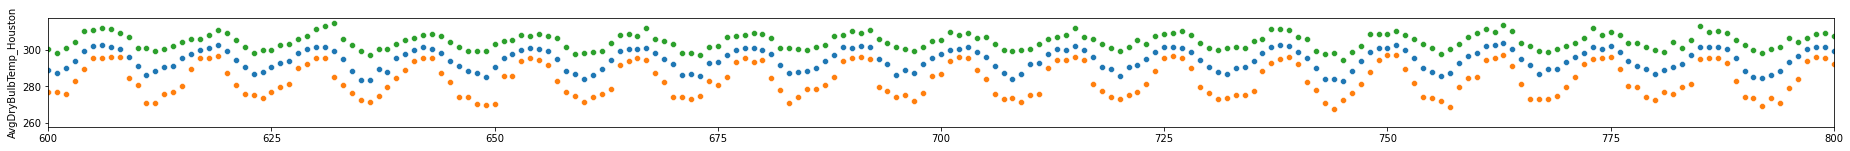

In [99]:
plt.figure(figsize=(32,2))
sns.scatterplot(data=houston_temps, x = houston_temps.index,y='AvgDryBulbTemp_Houston')
sns.scatterplot(data=houston_temps, x = houston_temps.index,y='MinDryBulbTemp_Houston')
sns.scatterplot(data=houston_temps, x = houston_temps.index,y='MaxDryBulbTemp_Houston')
plt.xlim(600,800)
#plt.axhline(houston_aggr['AvgDryBulbTemp_Houston'].mean())
#plt.axhline(houston_aggr['MinDryBulbTemp_Houston'].mean())
#plt.axhline(houston_aggr['MaxDryBulbTemp_Houston'].mean())

<AxesSubplot:ylabel='AvgStationPressure_Houston'>

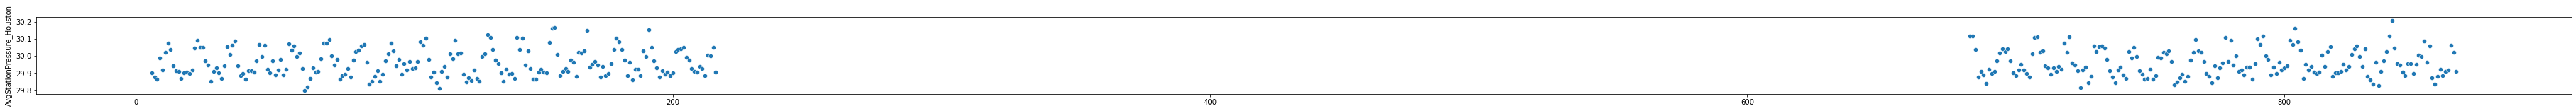

In [100]:
plt.figure(figsize=(64,2))
sns.scatterplot(x=date_values.index,y=houston_monthly_avg['AvgStationPressure_Houston'])

(400.0, 800.0)

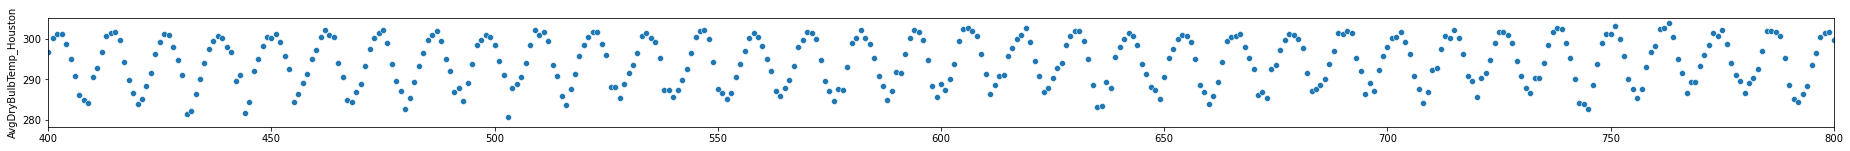

In [101]:
plt.figure(figsize=(32,2))
sns.scatterplot(x=date_values.index,y=houston_monthly_avg['AvgDryBulbTemp_Houston'])
#plt.axhline(houston_hourly['HourlyDryBulbTemperature'].mean())
plt.xlim(400,800)

In [ ]:
plt.figure(figsize = (12,6))
sns.scatterplot(data=houston_monthly_avg, x='Month', y='AvgWetBulbTemp_Houston', color = 'g')
sns.scatterplot(data=houston_monthly_min, x='Month', y='MinWetBulbTemp_Houston', color = 'b')
sns.scatterplot(data=houston_monthly_max, x='Month', y='MaxWetBulbTemp_Houston', color='r')

In [ ]:
concatenated = pd.concat([houston_monthly_avg.assign(dataset='AvgWetBulbTemp_Houston'), houston_monthly_min.assign(dataset='MinWetBulbTemp_Houston')])

In [ ]:
plt.figure(figsize=(12,6))
for i in range(1,13):
    print(sns.violinplot(data=houston_hourly[houston_hourly['MONTH']==i], x='HOUR',y='HourlyDryBulbTemperature',plot_kws={'alpha':1000000}));
    print(f'Month {i}');
    
#for i in range(1,13):
#    print(sns.violinplot(data=newyork_hourly[newyork_hourly['MONTH']==i], x='HOUR',y='HourlyDryBulbTemperature'));
#    print(f'Month {i}');

In [ ]:
htown_scatter = date_values.copy()
htown_scatter['MinTemp'] = houston_monthly_min['MinDryBulbTemp_Houston']
htown_scatter['MaxTemp'] = houston_monthly_max['MaxDryBulbTemp_Houston']
htown_scatter['AvgTemp'] = houston_monthly_avg['AvgDryBulbTemp_Houston']

column_list = ['MinTemp','MaxTemp','AvgTemp']
plt.figure(figsize=(8,4))
sns.scatterplot(data=htown_scatter, x='Month', y='MinTemp')
sns.scatterplot(data=htown_scatter, x='Month', y='MaxTemp')
sns.scatterplot(data=htown_scatter, x='Month', y='AvgTemp')
plt.legend()

In [ ]:
plt.figure(figsize=(9,6))
sns.histplot(houston_hourly['HourlyWindDirection'])

In [ ]:
plt.figure(figsize=(9,6))
sns.scatterplot(x=houston_monthly_avg.index,y=houston_monthly_avg['Precipitation_Houston'])
plt.xlim(600,850)

In [ ]:
np.mean(np.sqrt((houston_hourly['HourlyDryBulbTemperature'] - houston_hourly['HourlyDewPointTemperature']) ** 2))

In [ ]:
np.mean(np.sqrt((houston_hourly['HourlyDryBulbTemperature'] - houston_hourly['HourlyWetBulbTemperature']) ** 2))

In [ ]:
np.mean(np.sqrt((houston_hourly['HourlyWetBulbTemperature'] - houston_hourly['HourlyDewPointTemperature']) ** 2))